# Step 1 : Importing Packages

In [2]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 : Data Preprocessing

In [4]:
#Loading DataSet(csv file)
data = pd.read_csv('Default_Fin.csv')

In [7]:
#printing first 5 rows
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [9]:
#printing last 5 rows
data.tail()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0
9999,10000,0,2411.04,202355.40,0


In [11]:
#description of Dataset
data.describe

<bound method NDFrame.describe of       Index  Employed  Bank Balance  Annual Salary  Defaulted?
0         1         1       8754.36      532339.56           0
1         2         0       9806.16      145273.56           0
2         3         1      12882.60      381205.68           0
3         4         1       6351.00      428453.88           0
4         5         1       9427.92      461562.00           0
...     ...       ...           ...            ...         ...
9995   9996         1       8538.72      635908.56           0
9996   9997         1       9095.52      235928.64           0
9997   9998         1      10144.92      703633.92           0
9998   9999         1      18828.12      440029.32           0
9999  10000         0       2411.04      202355.40           0

[10000 rows x 5 columns]>

In [13]:
#information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [15]:
#rows and columns of Dataset
data.shape

(10000, 5)

# Step 3: Exploitary Data Analysis

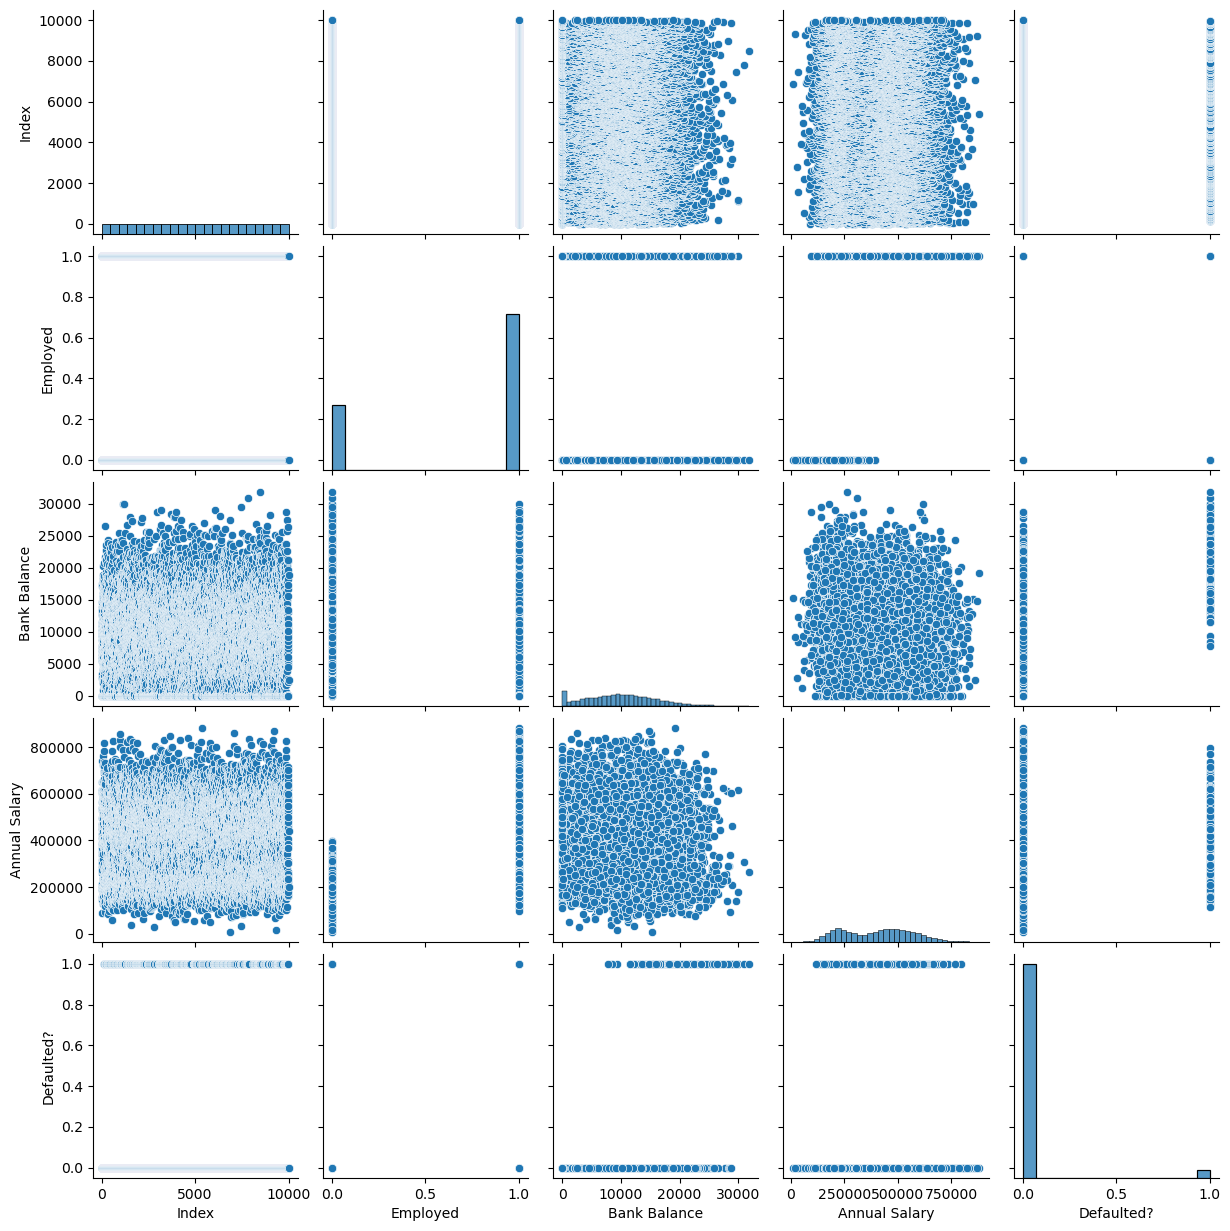

In [18]:
#Visualization of data using pairplot
sns.pairplot(data)

In [20]:
#correlation
correlation=data.corr()

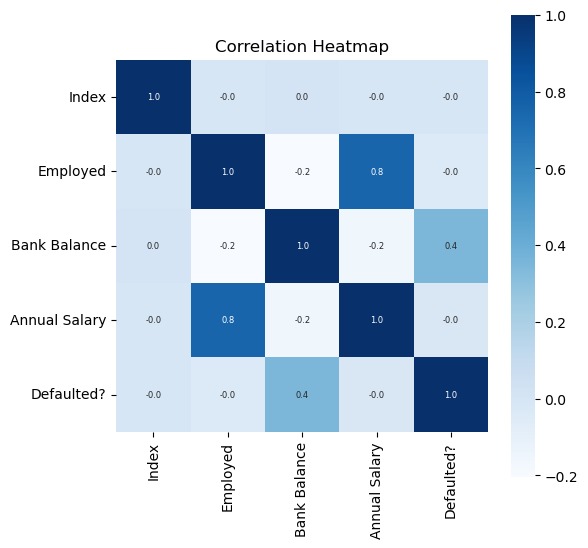

In [22]:
#Correlation HeatMap
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':6},cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
#Na Values
data.isna()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9995,False,False,False,False,False
9996,False,False,False,False,False
9997,False,False,False,False,False
9998,False,False,False,False,False


In [26]:
#finding No of NA values
data.isna().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

# Step 4: Future Engineering

Text(0, 0.5, 'Frequency')

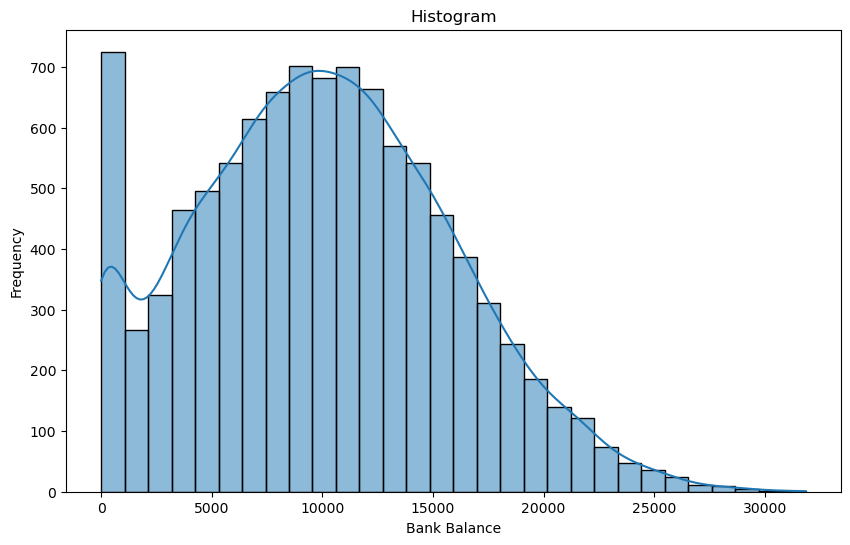

In [29]:
#Making a Histogram for Bank Balance
plt.figure(figsize=(10,6))
sns.histplot(data['Bank Balance'],bins=30,kde=True,edgecolor='black')
plt.title('Histogram')
plt.xlabel('Bank Balance')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

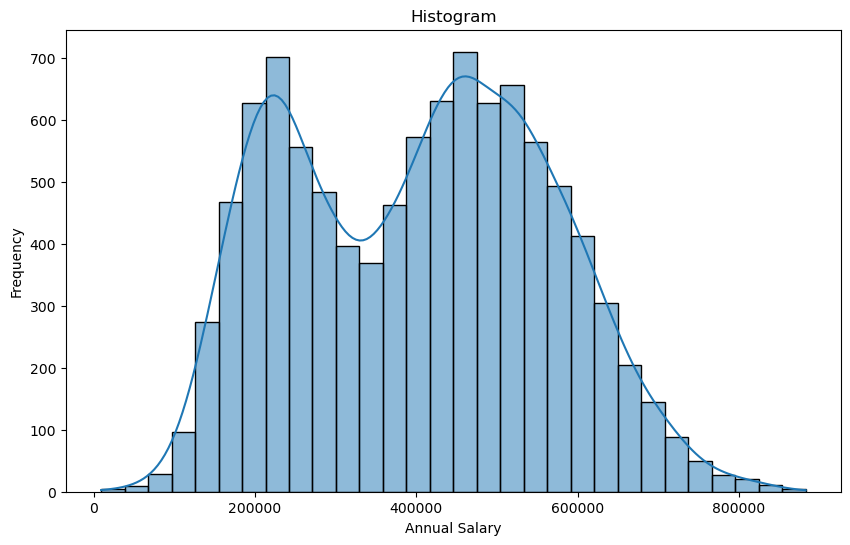

In [31]:
#Making a Histogram for Bank Balance
plt.figure(figsize=(10,6))
sns.histplot(data['Annual Salary'],bins=30,kde=True,edgecolor='black')
plt.title('Histogram')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')

In [33]:
#importing MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
data = pd.DataFrame(data)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Select columns to scale
columns_to_scale = ['Bank Balance', 'Annual Salary']
# Apply scaling
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
print(data)

      Index  Employed  Bank Balance  Annual Salary  Defaulted?
0         1         1      0.274846       0.598905           0
1         2         0      0.307868       0.155727           0
2         3         1      0.404454       0.425862           0
3         4         1      0.199392       0.479959           0
4         5         1      0.295993       0.517867           0
...     ...       ...           ...            ...         ...
9995   9996         1      0.268076       0.717488           0
9996   9997         1      0.285557       0.259524           0
9997   9998         1      0.318503       0.795032           0
9998   9999         1      0.591116       0.493213           0
9999  10000         0      0.075695       0.221084           0

[10000 rows x 5 columns]


# Step 5: Dividing Data into x & y Variables

In [36]:
#Splitting columns into x and y with input and target columns
x = data.drop(['Index','Defaulted?'],axis=True)
y = data['Defaulted?']

In [38]:
#printing x
x

,Employed,Bank Balance,Annual Salary
0,1,0.274846,0.598905
1,0,0.307868,0.155727
2,1,0.404454,0.425862
3,1,0.199392,0.479959
4,1,0.295993,0.517867
...,...,...,...
9995,1,0.268076,0.717488
9996,1,0.285557,0.259524
9997,1,0.318503,0.795032
9998,1,0.591116,0.493213


In [40]:
#printing y
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted?, Length: 10000, dtype: int64

# Step 6: Splitting the dataset to traing and testing paths

In [43]:
#Splitting Training and Testing Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1430)

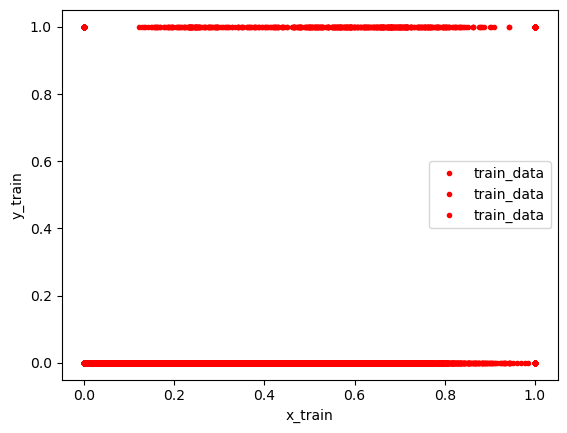

In [45]:
#Visualization of Training data
plt.plot(x_train,y_train,'r.',label='train_data')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

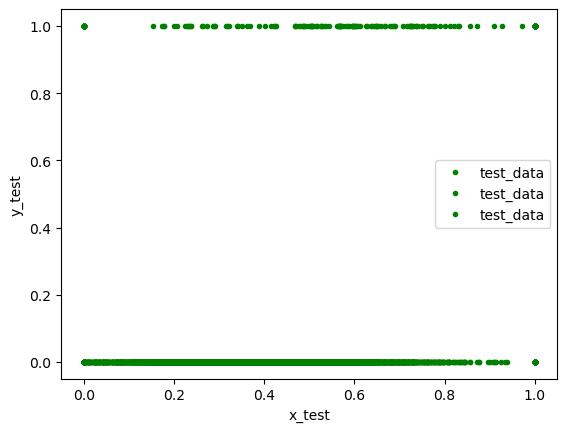

In [47]:
#Visualization of Testing data
plt.plot(x_test,y_test,'g.',label='test_data')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

# Step 7: Train The Model 

### 1. LogisticRegression Algorithm

In [51]:
#Importing LogisticRegression
from sklearn.linear_model import LogisticRegression
Model=LogisticRegression()
Model.fit(x_train,y_train)

LogisticRegression()

In [53]:
#predicting pm2.5 using LogisticRegression on Testing data
y_pred=Model.predict(x_test).round(1)

In [55]:
#creating and printing a dataframe with original and predicted values of Defauled?
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Defaulted?","Predict Defaulted?"])
calculation

,Original Defaulted?,Predict Defaulted?
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


In [57]:
#printing training and testing accuracy
print("Training Accuracy :", Model.score(x_train, y_train))
print("Testing Accuracy :", Model.score(x_test, y_test))

Training Accuracy : 0.971625
Testing Accuracy : 0.9735


### 2. RandomForestClassifier Algorithm

In [95]:
#importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#Fitting training data into RandomForestClassifier
model=RandomForestClassifier(n_estimators=1)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1)

In [96]:
#predicting pm2.5 using RandomForestClassifier on Testing data
y_pred=model.predict(x_test).round(1)

In [97]:
#creating and printing a dataframe with original and predicted values of Defaulted?
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Defaulted?","Predict Defaulted?"])
calculation

,Original Defaulted?,Predict Defaulted?
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,0,1
1998,0,0


In [98]:
#printing training and testing accuracy
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9825
Testing Accuracy : 0.957


### 3. SupportVectorMachine Algorithm

In [99]:
#importing supportvectormachine
from sklearn.svm import SVC
model=SVC(kernel='linear')
#fitting input and output columns of training data
model.fit(x_train,y_train)
#predicting result column
y_pred=model.predict(x_test).round(1)

In [100]:
#creating and printing a dataframe with original and predicted values of Defaulted?
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Defaulted?","Predict Defaulted?"])
calculation

,Original Defaulted?,Predict Defaulted?
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


In [101]:
#printing training and testing accuracy
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.966
Testing Accuracy : 0.9695
